In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import time


Bad key "text.kerning_factor" on line 4 in
C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
nc_file = r"E:\hgt.2012.nc"
fh = Dataset(nc_file, mode='r')

In [4]:
lons = fh.variables['lon'][:].data
lats = fh.variables['lat'][:].data
times = fh.variables['time'][:].data
times = times - times[0]
hgt = fh.variables['hgt'][:].data

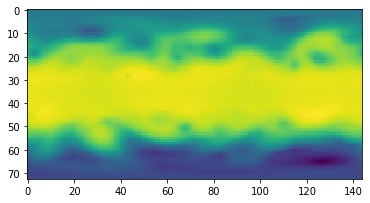

In [5]:
p_hgts = hgt[301,3]
plt.imshow(p_hgts)

### 240 -340 Longitude
### 20 - 80 Latitude

In [6]:
def get_hgt(day,level,US_focus=True):
    new_hgt = hgt[day-1,level-1]
    std_hgts = (new_hgt - new_hgt.min())/(new_hgt.max()-new_hgt.min())
    if US_focus:
        return std_hgts[:60,80:]
    else:
        return std_hgts

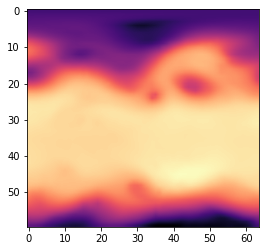

In [7]:
p_hgts = p_hgts[:60,80:]
p_hgts = (p_hgts - p_hgts.min())/(p_hgts.max()-p_hgts.min())
plt.imshow(p_hgts,interpolation='bilinear', cmap='magma')

In [8]:
from skimage import measure

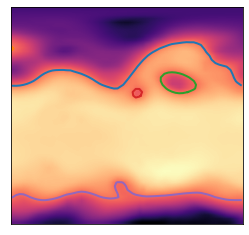

In [9]:
contours = measure.find_contours(p_hgts, 0.7)
fig, ax = plt.subplots()
ax.imshow(p_hgts,interpolation='bilinear', cmap='magma')

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### To get basemap to work
```
conda activate base
```

In [10]:
import cartopy.crs as ccrs

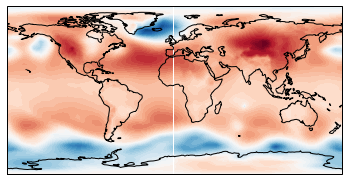

In [11]:
hgs = get_hgt(1,1,US_focus=False)
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, hgs, 60,
             transform=ccrs.PlateCarree(),cmap='RdBu_r')

ax.coastlines()

plt.show()

In [104]:
def transform_contour(contour):
    cnt = contour.copy()
    cnt[:,0] = contour[:,0]*(end_lat-start_lat)/trunc_hgs.shape[0] + start_lat
    cnt[:,1] = contour[:,1]*(end_lon-start_lon)/trunc_hgs.shape[1] + start_lon
    return cnt

In [2]:
%run netCDF_Processing.py

In [3]:
cdf = CDF("E:\hgt.2012.nc")

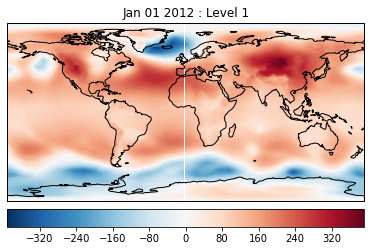

In [4]:
cdf.plot(norm=False)

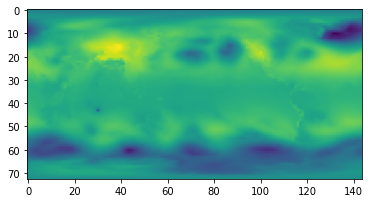

In [5]:
plt.imshow(cdf.hgts[0,0])

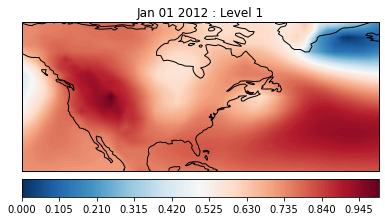

In [8]:
cdf.plot(loc=True)